In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
movies_df = pd.read_csv("Resources/api_merge_df.csv")
movies_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [3]:
#Eliminating the blank values
new_df = movies_df.loc[movies_df["rating"] != ""]
new_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [4]:
#Eliminating the "Not Rated" values
not_rated_df = new_df["rating"]=="Not Rated"
NR_df = new_df[not_rated_df]
NR_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
9,Kabhi Alvida Naa Kehna,India,11 Aug 2006,6.1,NaN,58%,10750000,3275443,29300000,Not Rated,Drama,32575443,303.03%
22,Manderlay,"Denmark, Sweden, Netherlands, France, Germany,...",03 Jun 2005,7.3,46.0,50%,14200000,74205,469101,Not Rated,Drama,543306,3.83%
44,Days of Glory,"Algeria, France, Morocco, Belgium",27 Sep 2006,7.0,82.0,83%,18900000,320700,25742872,Not Rated,Drama,26063572,137.90%
344,Welcome to the Sticks,France,27 Feb 2008,7.1,NaN,14%,16000000,1477650,245996847,Not Rated,Comedy,247474497,1546.72%
351,Tell No One,"France, UK",01 Nov 2006,7.5,82.0,85%,18500000,6198883,27755135,Not Rated,Thriller/Suspense,33954018,183.54%
374,Passchendaele,Canada,17 Oct 2008,6.4,NaN,23%,20000000,4452423,904,Not Rated,Drama,4453327,22.27%
467,Asterix at the Olympic Games,"France, Germany, Spain, Italy, Belgium",13 Jun 2008,5.2,NaN,87%,113500000,999811,132000000,Not Rated,Adventure,132999811,117.18%
491,Home,USA,27 Mar 2015,6.6,55.0,82%,12000000,0,1620056,Not Rated,Documentary,1620056,13.50%
493,Home,USA,27 Mar 2015,8.1,90.0,98%,12000000,0,1620056,Not Rated,Documentary,1620056,13.50%


The correlation coefficient is 0.47
The linear regression line equation is y = 2.02x + 8862477.56


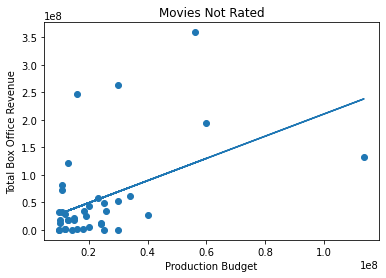

In [5]:
xnr = NR_df["production_budget"]
ynr = NR_df["Total Box Office"]
plt.scatter(xnr, ynr)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Not Rated")
correlationNR = st.pearsonr(xnr,ynr)
m, b = np.polyfit(xnr, ynr, 1)
plt.plot(xnr, m*xnr + b)
line_eq_NR = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationNR[0],2)))
print("The linear regression line equation is " + line_eq_NR)
plt.show()

In [6]:
#Selecting all the movies that are rated G
G_rating = new_df["rating"]=="G"
G_df = new_df[G_rating]
G_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
46,Doogal,"USA, UK, France",24 Feb 2006,2.8,23.0,8%,20000000,7578946,20479706,G,Adventure,28058652,140.29%
137,The Wild,"Canada, USA",14 Apr 2006,5.3,47.0,50%,80000000,37384046,61626621,G,Adventure,99010667,123.76%
139,Charlotte's Web,"USA, Germany, Australia",15 Dec 2006,6.3,68.0,78%,82500000,82985708,61000000,G,Drama,143985708,174.53%
196,The Pirates Who Don't Do Anything: A VeggieTal...,USA,11 Jan 2008,5.7,49.0,43%,15000000,12981269,267175,G,Adventure,13248444,88.32%
234,Mr. Bean's Holiday,"UK, France, Germany, USA",24 Aug 2007,6.4,56.0,51%,25000000,33302167,201679175,G,Adventure,234981342,939.93%
302,Ratatouille,USA,29 Jun 2007,8.0,96.0,77%,150000000,206445654,420104041,G,Adventure,626549695,417.70%
316,Kit Kittredge: An American Girl,"USA, Canada",02 Jul 2008,6.5,63.0,46%,10000000,17657973,0,G,Drama,17657973,176.58%
323,High School Musical 3,USA,24 Oct 2008,4.8,57.0,22%,11000000,90559416,183833464,G,Musical,274392880,2494.48%
339,U2 3D,USA,22 Feb 2008,8.3,83.0,84%,15000000,12898847,13271555,G,Concert/Performance,26170402,174.47%
389,Fly Me to the Moon,Philippines,04 Jan 1988,5.6,NaN,75%,25000000,14543943,28986338,G,Adventure,43530281,174.12%


The correlation coefficient is 0.86
The linear regression line equation is y = 3.48x + -11047154.85


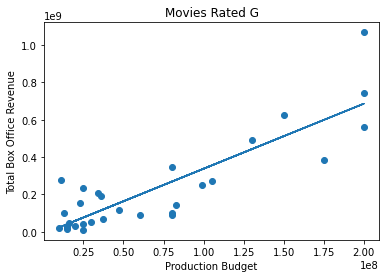

In [7]:
#Comparing box office revenue and production budget for movies rated G
xg = G_df["production_budget"]
yg = G_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Rated G")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

In [8]:
#Selecting all the movies that are rated PG
PG_rating = new_df["rating"]=="PG"
PG_df = new_df[PG_rating]

The correlation coefficient is 0.7
The linear regression line equation is y = 3.41x + -15237975.65


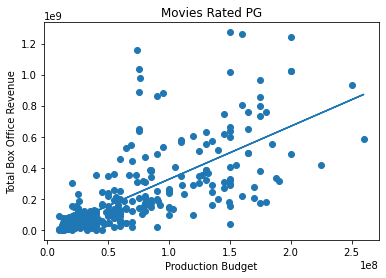

In [9]:
#Comparing box office revenue and production budget for movies rated PG
xpg = PG_df["production_budget"]
ypg = PG_df["Total Box Office"]
plt.scatter(xpg, ypg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Rated PG")
correlationPG = st.pearsonr(xpg,ypg)
m, b = np.polyfit(xpg, ypg, 1)
plt.plot(xpg, m*xpg + b)
line_eq_PG = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationPG[0],2)))
print("The linear regression line equation is " + line_eq_PG)
plt.show()

In [10]:
#Selecting all the movies that are rated PG-13
PG13_rating = new_df["rating"]=="PG-13"
PG13_df = new_df[PG13_rating]

The correlation coefficient is 0.8
The linear regression line equation is y = 3.6x + -32365557.81


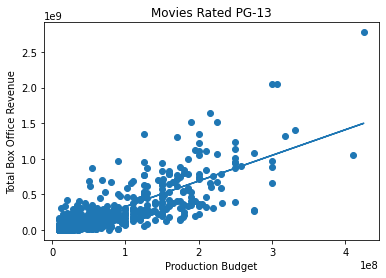

In [11]:
#Comparing box office revenue and production budget for movies rated PG-13
xpg13 = PG13_df["production_budget"]
ypg13 = PG13_df["Total Box Office"]
plt.scatter(xpg13, ypg13)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Rated PG-13")
correlationPG13 = st.pearsonr(xpg13,ypg13)
m, b = np.polyfit(xpg13, ypg13, 1)
plt.plot(xpg13, m*xpg13 + b)
line_eq_PG13 = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationPG13[0],2)))
print("The linear regression line equation is " + line_eq_PG13)
plt.show()

In [12]:
#Selecting all the movies that are rated R
R_rating = new_df["rating"]=="R"
R_df = new_df[R_rating]

The correlation coefficient is 0.53
The linear regression line equation is y = 2.36x + 7689415.33


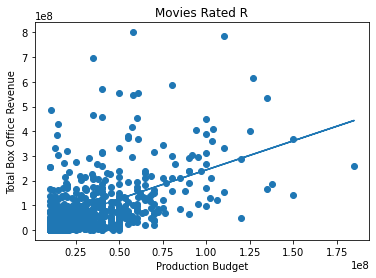

In [13]:
#Comparing box office revenue and production budget for movies rated R
xr = R_df["production_budget"]
yr = R_df["Total Box Office"]
plt.scatter(xr, yr)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Rated R")
correlationR = st.pearsonr(xr,yr)
m, b = np.polyfit(xr, yr, 1)
plt.plot(xr, m*xr + b)
line_eq_R = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationR[0],2)))
print("The linear regression line equation is " + line_eq_R)
plt.show()